# EDA

En la primera parte de este trabajo vamos a realizar un EDA de los datos con los que vamos a trabajar, con el fin de tener el mejor dataset posible para la búsqueda y prueba de modelos de Machine Learning, a la vez que entendemos los datos que estamos trabajando.

En este notebook los pasos que se van a seguir son:
- Análisis inicial de los datos
- Estudio de valores missing
- Estudio de asimetría
- Preprocesamiento inicial de algunas variables
- Tratamiento de variables continuas
- Tratamiento de valores nulos

### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import scipy.stats as ss
import warnings
from collections import Counter

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

# Descripcion del problema

"Estamos utilizando el 'Bank Account Fraud Dataset Suite' de NeurIPS 2022, que proporciona información sobre cuentas bancarias y casos de fraude. Este conjunto de datos plantea retos comunes en el mundo real, como la dinámica temporal y un desequilibrio de clases significativo. Cada variante del conjunto de datos contiene también tipos específicos de sesgos de los datos, lo que permite a los profesionales probar tanto el rendimiento como la equidad de los métodos de aprendizaje automático.

El problema que tenemos, seria que queremos predecir los fraudes dentro de un gran numero de cuentas, que no lo han cometido, esto es especialmente complicado, dado que el numero de personas que comenten fraude, es mucho menor de aqeullas qeu no lo cometen, por lo tantqo nuestro trabajo es identificar una clase minoritaria muy pequeña, dentro de una masiva clase mayoritaria.

Se puede acceder al conjunto de datos en Kaggle a través de este [enlace](https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022). Nuestra principal preocupación es identificar qué cuentas tienen más probabilidades de cometer fraude y cuáles tienen menos. 

El coste más crítico para nosotros es identificar erróneamente el fraude (falsos negativos), mientras que etiquetar mal los casos no fraudulentos (falsos positivos) es menos costoso. Por lo tanto, nos interesa predecir con exactitud los casos fraudulentos e identificar los que podrían pasar erróneamente por no fraudulentos".

# Descripcion del dataset

Esatmos usando el dataset base, del conjunto de datos "Bank Account Fraud Dataset Suite" de NeurIPS 2022, disponible en Kaggle. Este conjunto de datos proporciona una suite realista y a gran escala de conjuntos de datos tabulares para la detección de fraudes en la apertura de cuentas bancarias. 

Fue generado aplicando técnicas de generación de datos tabulares de última generación sobre un conjunto de datos de detección de fraude en la apertura de cuentas bancarias del mundo real y anonimizado.

# Diccionario de datos

## Descripción de Variables

- `fraud_bool`: Etiqueta de fraude (1 si es fraude, 0 si es legítimo).
- `income`: Ingreso anual del solicitante en cuantiles. Rango [0, 1].
- `name_email_similarity`: Similitud entre el correo electrónico y el nombre del solicitante. Rango [0, 1].
- `prev_address_months_count`: Meses en la dirección anterior registrada. Rango [−1, 380] meses (-1 indica valor faltante).
- `current_address_months_count`: Meses en la dirección actual. Rango [−1, 406] meses (-1 indica valor faltante).
- `customer_age`: Edad del solicitante en rangos por década (ej. 20-29 representado como 20).
- `days_since_request`: Días transcurridos desde la solicitud. Rango [0, 78] días.
- `intended_balcon_amount`: Monto inicial transferido para la solicitud. Rango [−1, 108].
- `payment_type`: Tipo de plan de pago de crédito. 5 valores posibles (anonimizados).
- `zip_count_4w`: Número de solicitudes en el mismo código postal en las últimas 4 semanas. Rango [1, 5767].
- `velocity_6h`: Velocidad de solicitudes en las últimas 6 horas. Rango [−211, 24763].
- `velocity_24h`: Velocidad de solicitudes en las últimas 24 horas. Rango [1329, 9527].
- `velocity_4w`: Velocidad de solicitudes en las últimas 4 semanas. Rango [2779, 7043].
- `bank_branch_count_8w`: Solicitudes totales en la sucursal seleccionada en las últimas 8 semanas. Rango [0, 2521].
- `date_of_birth_distinct_emails_4w`: Correos electrónicos distintos para solicitantes con la misma fecha de nacimiento en 4 semanas. Rango [0, 42].
- `employment_status`: Estado laboral del solicitante. 7 valores posibles (anonimizados).
- `credit_risk_score`: Puntuación de riesgo de la solicitud. Rango [−176, 387].
- `email_is_free`: Dominio del correo electrónico (gratuito o de pago).
- `housing_status`: Estado residencial del solicitante. 7 valores posibles (anonimizados).
- `phone_home_valid`: Validez del teléfono fijo proporcionado.
- `phone_mobile_valid`: Validez del teléfono móvil proporcionado.
- `bank_months_count`: Antigüedad de la cuenta bancaria anterior en meses. Rango [−1, 31] meses (-1 indica valor faltante).
- `has_other_cards`: Si el solicitante tiene otras tarjetas del mismo banco.
- `proposed_credit_limit`: Límite de crédito propuesto. Rango [200, 2000].
- `foreign_request`: Si el país de origen de la solicitud es diferente al del banco.
- `source`: Fuente en línea de la solicitud (navegador o app móvil).
- `session_length_in_minutes`: Duración de la sesión en el sitio web del banco en minutos. Rango [−1, 107] minutos.
- `device_os`: Sistema operativo del dispositivo utilizado para la solicitud.
- `keep_alive_session`: Opción del usuario sobre mantener la sesión activa.
- `device_distinct_emails_8w`: Correos electrónicos distintos desde el dispositivo en las últimas 8 semanas. Rango [0, 3].
- `device_fraud_count`: Número de solicitudes fraudulentas con el dispositivo. Rango [0, 1].
- `month`: Mes de la solicitud. Rango [0, 7].

Nueva variable:
- `ratio_inc_cred`: Variable creada a partir de la división de `income` entre `proposed_credit_limit`. Rango [0, 0.0045].

# Cargamos los datos

In [2]:
path_folder = './data/'
pd_fraude = pd.read_csv(path_folder + 'base.csv')

In [3]:
pd_fraude

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,7905.711839,8341.468557,4972.635997,1,8,CA,75,1,BC,1,1,25,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,5391.470463,4955.170808,5022.728108,0,2,CC,154,1,BC,1,1,-1,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,8063.102636,5670.654316,4377.196321,2023,6,CF,64,0,BC,0,1,11,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,8092.641762,3982.582204,4394.803296,1678,6,CA,163,0,BA,1,0,28,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


<a id="toc"></a>
# **Índice**

- [1. Información del Dataframe](#1_Información_del_Dataframe)
    - [1.1 Análisis General de la Tabla](#1.1_Análisis_General_de_la_Tabla)
    - [1.2 Exploración y Visualización de la Variable Objetivo](#1.2_Exploración_y_Visualización_de_la_Variable_Objetivo)
- [2. Separación en Train y Test Estratificado](#2_Separación_en_Train_y_Test_Estratificado)
- [3. Estudio de los Valores Missing](#3_Estudio_de_los_Valores_Missing)
- [4. Tipos: Variables Categóricas y Numéricas](#4_Tipos:_Variables_Categóricas_y_Numéricas)
    - [4.1 Variables Categóricas](#4.1_Variables_Categóricas)
    - [4.2 Variables Numéricas](#4.2_Variables_Numéricas)
- [5. Asimetría](#5_Asimetría)
- [6. Preprocesamiento Inicial de Algunas Variables](#6_Preprocesamiento_Inicial_de_Algunas_Variables)
    - [6.1 Visualización Descriptiva de los Datos](#6.1_Visualización_Descriptiva_de_los_Datos)
- [7. Tratamiento de las Variables Continuas](#7_Tratamiento_de_las_Variables_Continuas)
    - [7.1 Tratamiento de Outliers](#7.1_Tratamiento_de_Outliers)
    - [7.2 Correlaciones](#7.2_Correlaciones)
    - [7.3 Tratamiento de Valores Nulos](#7.3_Tratamiento_de_Valores_Nulos)
    - [7.4 Tratamiento de las Variables Categóricas](#7.4_Tratamiento_de_las_Variables_Categóricas)
- [8. Tratamiento de Valores Nulos (Continuación)](#8_Tratamiento_de_Valores_Nulos_(Continuación))
- [9. Guardado de los Dataframes](#9_Guardado_de_los_Dataframes)
- [Conclsuion](#10)


# 1 Informacion del Dataframe

In [4]:
pd_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
pd_fraude.nunique()
# what values are unique and a count

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

Vemos el numero de los valores unicos del dataset

# 1.1 Análisis general de la tabla

Dimensión

In [6]:
print("Numero de filas:", pd_fraude.shape[0])
print("Numero de columnas:", pd_fraude.shape[1])

Numero de filas: 1000000
Numero de columnas: 32


In [7]:
print(pd_fraude.drop_duplicates().shape)

(1000000, 32)


Comprobamos si efectivamente, no hay ningún duplicado en la tabla

Vemos los tipos de datos

In [8]:
pd_fraude.dtypes.to_dict()

{'fraud_bool': dtype('int64'),
 'income': dtype('float64'),
 'name_email_similarity': dtype('float64'),
 'prev_address_months_count': dtype('int64'),
 'current_address_months_count': dtype('int64'),
 'customer_age': dtype('int64'),
 'days_since_request': dtype('float64'),
 'intended_balcon_amount': dtype('float64'),
 'payment_type': dtype('O'),
 'zip_count_4w': dtype('int64'),
 'velocity_6h': dtype('float64'),
 'velocity_24h': dtype('float64'),
 'velocity_4w': dtype('float64'),
 'bank_branch_count_8w': dtype('int64'),
 'date_of_birth_distinct_emails_4w': dtype('int64'),
 'employment_status': dtype('O'),
 'credit_risk_score': dtype('int64'),
 'email_is_free': dtype('int64'),
 'housing_status': dtype('O'),
 'phone_home_valid': dtype('int64'),
 'phone_mobile_valid': dtype('int64'),
 'bank_months_count': dtype('int64'),
 'has_other_cards': dtype('int64'),
 'proposed_credit_limit': dtype('float64'),
 'foreign_request': dtype('int64'),
 'source': dtype('O'),
 'session_length_in_minutes': dty

In [9]:
# We see information about the categorical variables, since they are the ones that can give us the most problems.
pd_fraude.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


# 1.2 Exploración y visualización de la variable objetivo

In [10]:
pd_fraude_bool = pd_fraude['fraud_bool'].value_counts(normalize = True).mul(100).reset_index()
pd_fraude_bool['conteo'] = pd_fraude['fraud_bool'].value_counts()

pd_fraude_bool

,fraud_bool,proportion,conteo
0,0,98.8971,988971
1,1,1.1029,11029


La variable objetivo está representada por 0 y 1. El valor 0 representa que no se ha cometido fraude, y la variable 1 que sí se ha cometido. En la muestra de datos, hay un 98.9% de instancias donde no se ha cometido fraude y un 1.1% donde se ha cometido. 

Por lo tanto podemos establecer que el dataset se encuentra altamente desbalanceado en su variable objetivo

# 2 Separación en Train y Test Estratificado


Separamos los datos en dos conjuntos en los que se mantenga una proporción muy similar de la variable objetivo

In [11]:
X_pd_fraude, X_pd_fraude_test, y_pd_fraude, y_pd_fraude_test = train_test_split(pd_fraude.drop('fraud_bool',axis=1), 
                                                                     pd_fraude['fraud_bool'], 
                                                                     stratify=pd_fraude['fraud_bool'], 
                                                                     test_size=0.2,
                                                                     random_state=33)
pd_fraude_train = pd.concat([X_pd_fraude, y_pd_fraude],axis=1)
pd_fraude_test = pd.concat([X_pd_fraude_test, y_pd_fraude_test],axis=1)

Separamos entre test y train, establecemos el tamaño del test, en un 20% dado que es una medida estandar para estos casos, asimismo establecemos una semilla estandar para la separación, con el objetivo de poder reproducir el resultado 

In [12]:
print('== Train\n', pd_fraude_train['fraud_bool'].value_counts(normalize=True))
print('== Test\n', pd_fraude_test['fraud_bool'].value_counts(normalize=True))

== Train
 fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64
== Test
 fraud_bool
0    0.98897
1    0.01103
Name: proportion, dtype: float64


# 3 Estudio de los valores missing

Variables donde los valores missing se representan con un -1:
- prev_address_months_count
- current_address_months_count
- bank_months_count
- session_length_in_minutes
- device_distinct_emails

Variables donde los valores missing se representan con un número negativo:
- intended_balcon_amount

In [13]:
lista_missing = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count',\
                  'session_length_in_minutes', 'device_distinct_emails_8w', 'intended_balcon_amount']

pd_series_null_columns = pd_fraude_train\
.drop(lista_missing, axis=1)\
.isnull().sum().sort_values(ascending=False)
pd_series_null_columns

income                              0
name_email_similarity               0
month                               0
device_fraud_count                  0
keep_alive_session                  0
device_os                           0
source                              0
foreign_request                     0
proposed_credit_limit               0
has_other_cards                     0
phone_mobile_valid                  0
phone_home_valid                    0
housing_status                      0
email_is_free                       0
credit_risk_score                   0
employment_status                   0
date_of_birth_distinct_emails_4w    0
bank_branch_count_8w                0
velocity_4w                         0
velocity_24h                        0
velocity_6h                         0
zip_count_4w                        0
payment_type                        0
days_since_request                  0
customer_age                        0
fraud_bool                          0
dtype: int64

Del resto de variables, vemos que no existen valores nulos entre sus datos

Vemos el número de valores missing para las demás variables

In [14]:
pd_series_null_columns_missing = (pd_fraude_train[lista_missing] < 0)\
.sum().sort_values(ascending=False)
pd_series_null_columns_missing

intended_balcon_amount          593886
prev_address_months_count       570422
bank_months_count               203020
current_address_months_count      3376
session_length_in_minutes         1620
device_distinct_emails_8w          279
dtype: int64

In [15]:
pd_null_columnas_final = pd.concat((pd_series_null_columns, pd_series_null_columns_missing))\
.sort_values(ascending = False)
pd_null_columnas_final

intended_balcon_amount              593886
prev_address_months_count           570422
bank_months_count                   203020
current_address_months_count          3376
session_length_in_minutes             1620
device_distinct_emails_8w              279
name_email_similarity                    0
fraud_bool                               0
customer_age                             0
days_since_request                       0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
income                                   0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
has_other_c

In [16]:
pd_null_columnas = pd.DataFrame(pd_null_columnas_final, columns=['nulos_columnas']) 
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/pd_fraude_train.shape[0]
pd_null_columnas

,nulos_columnas,porcentaje_columnas
intended_balcon_amount,593886,0.742358
prev_address_months_count,570422,0.713028
bank_months_count,203020,0.253775
current_address_months_count,3376,0.004220
session_length_in_minutes,1620,0.002025
device_distinct_emails_8w,279,0.000349
name_email_similarity,0,0.000000
fraud_bool,0,0.000000
customer_age,0,0.000000
days_since_request,0,0.000000


Vemos que las variables 'intended_balcon_amount' y 'prev_address_months_count' poseen una gran cantidad de valores missing, con un 74 y 71% respectivamente de toda la muestra.

Esto podria ser una razon para eliminar estos valores, sin embargo vamos a comprobar si existe alguna relación de los valores missing respecto a la variable objetivo o si estos son importantes para la misma.

In [17]:
for variable in lista_missing:
    print(variable, '\n', pd_fraude_train[pd_fraude_train[variable] < 0]['fraud_bool'].value_counts(normalize=True), '\n')

prev_address_months_count 
 fraud_bool
0    0.985791
1    0.014209
Name: proportion, dtype: float64 

current_address_months_count 
 fraud_bool
0    0.997038
1    0.002962
Name: proportion, dtype: float64 

bank_months_count 
 fraud_bool
0    0.983539
1    0.016461
Name: proportion, dtype: float64 

session_length_in_minutes 
 fraud_bool
0    0.992593
1    0.007407
Name: proportion, dtype: float64 

device_distinct_emails_8w 
 fraud_bool
0    0.989247
1    0.010753
Name: proportion, dtype: float64 

intended_balcon_amount 
 fraud_bool
0    0.986875
1    0.013125
Name: proportion, dtype: float64 



Se observa que los valores missing no parecen un indicativo a simple vista de una mayor proporción de fraude, teniendo todas estas variables una proporción similar a la del dataset completo en cuanto a la variable objetivo. 

Como me genera dudas el eliminar variables como 'intended_balcon_amount', 'prev_address_months_count' o 'bank_months_count', que presentan una gran cantidad de valores missing, las voy a guardar en una lista y más adelante se tomará una decisión definitiva.

In [18]:
posibles_variables_eliminar = ['intended_balcon_amount', 'prev_address_months_count', 'bank_months_count']

# 4 Tipos: Variables categóricas y numéricas

# 4.1 Variables Categoricas

Agrupamos en una lista todas aquellas variables que son categóricas, las cuales ya identificamos en un apartado anterior, ya sea porque lo indica directamente la información del datasheet, o por la propia naturaleza de la variable que siendo númerica se trata como categórica.

In [19]:
lista_variables_categoricas = [
    'payment_type',
    'employment_status',
    'housing_status',
    'source',
    'device_os',
    'fraud_bool',
]

# 4.2 Variables Numericas

Agrupamos el resto de variables que no son categóricas en una lista, incluyendo aquellas que son binarias, dado que despues para transformaciones nos resultará mas ventajoso, sin embargo las variables binarias pueden ser consideradas como cualquiera de las dos.

In [20]:
lista_variables_numericas = []
for variable in pd_fraude_train.columns:
    if variable not in lista_variables_categoricas:
        lista_variables_numericas.append(variable)
lista_variables_numericas

['income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

Vemos qué tipo de variable numérica es cada una, si entera o continua

In [21]:
pd_fraude_train[lista_variables_numericas].dtypes.to_dict()

{'income': dtype('float64'),
 'name_email_similarity': dtype('float64'),
 'prev_address_months_count': dtype('int64'),
 'current_address_months_count': dtype('int64'),
 'customer_age': dtype('int64'),
 'days_since_request': dtype('float64'),
 'intended_balcon_amount': dtype('float64'),
 'zip_count_4w': dtype('int64'),
 'velocity_6h': dtype('float64'),
 'velocity_24h': dtype('float64'),
 'velocity_4w': dtype('float64'),
 'bank_branch_count_8w': dtype('int64'),
 'date_of_birth_distinct_emails_4w': dtype('int64'),
 'credit_risk_score': dtype('int64'),
 'email_is_free': dtype('int64'),
 'phone_home_valid': dtype('int64'),
 'phone_mobile_valid': dtype('int64'),
 'bank_months_count': dtype('int64'),
 'has_other_cards': dtype('int64'),
 'proposed_credit_limit': dtype('float64'),
 'foreign_request': dtype('int64'),
 'session_length_in_minutes': dtype('float64'),
 'keep_alive_session': dtype('int64'),
 'device_distinct_emails_8w': dtype('int64'),
 'device_fraud_count': dtype('int64'),
 'month':

Convertimos todas las variables numéricas a tipo decimal, para facilitar su tratamiento posteriormente

In [22]:
for variable in lista_variables_numericas:
    if (pd_fraude_train[variable].dtypes == 'int64'):
        pd_fraude_train[variable] = pd_fraude_train[variable].astype(float)
pd_fraude_train.dtypes

income                              float64
name_email_similarity               float64
prev_address_months_count           float64
current_address_months_count        float64
customer_age                        float64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                        float64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                float64
date_of_birth_distinct_emails_4w    float64
employment_status                    object
credit_risk_score                   float64
email_is_free                       float64
housing_status                       object
phone_home_valid                    float64
phone_mobile_valid                  float64
bank_months_count                   float64
has_other_cards                     float64
proposed_credit_limit           

# 5 Asimetria

In [23]:
from scipy.stats import skew

def plot_skewness(pd_fraude, numerical_vars):
    """
    Plots the asymmetry of the numerical characteristics of a DataFrame.

    Parameters:
    pd_fraud: Pandas DataFrame.
    numerical_vars: List of numerical column names in the DataFrame.
    """
    plt.figure(figsize=(12, 8))

    # Calculate the skewness of the numerical characteristics
    # and selects those with skewness higher than 0.5
    skew_features = pd_fraude[numerical_vars].apply(lambda x: skew(x.dropna()))  # 'NaN' is removed before calculating skew
    skew_features = skew_features[skew_features > 0.5].sort_values(ascending=False)

    # Creation of the bar chart for characteristics with high skewness
    ax = sns.barplot(x=skew_features.index, y=skew_features.values, color='Green')

    ax.set_ylabel('', fontsize=20)
    ax.set_xlabel('', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15)
    ax.axhline(y=1, color='red', linestyle='--', linewidth=3)

    ax.set_title('Asimetría', ha='center', weight='bold', fontsize=24)
    ax.text(0.01, 1.1, 'Umbral', color='red', transform=ax.transAxes, fontsize=15, weight='bold')
    sns.despine()
    plt.gca().set_facecolor('white')

    plt.show()

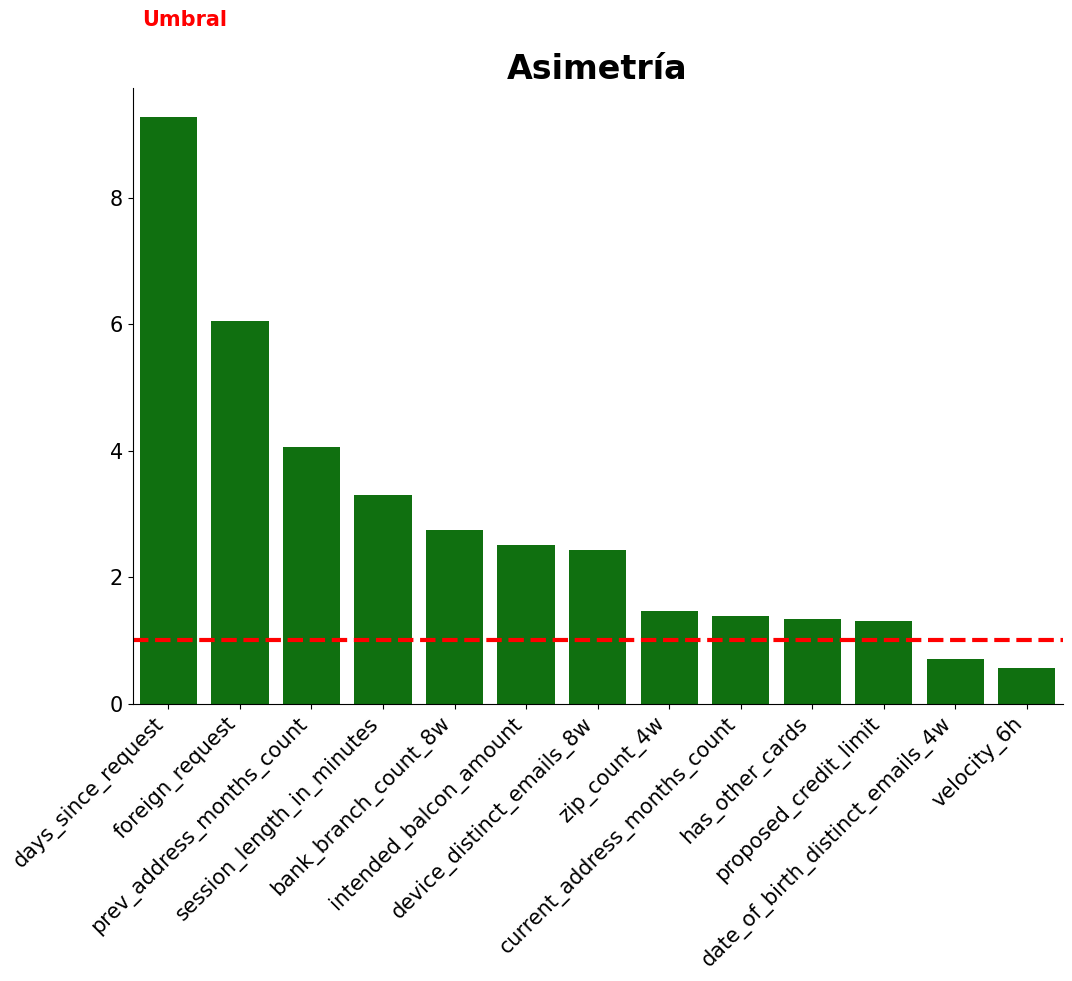

In [24]:
plot_skewness(pd_fraude, numerical_vars= lista_variables_numericas)


Con este gráfico, podemos ver la asimetria de las variables, la asimetria hace referencia a cuanto una variable se desvia de la normal, normalmente aquellas positivas, osea por encima de la línea roja que haría referencia al 1 pueden requerir un tratamiento especial o transformación (como la transformación logarítmica) y pueden resultar mas problematicas en general.

Podemos ver que las variables, "days_since_request" y "foreign_request" son altamente asimetricas esto nos quiere decir que es probable que sean neceasrias mas transformaciones en estas variables

# 6 Preprocesamiento inicial de algunas variables

Vamos a guardar las variables que son categóricas como 'category'

In [25]:
for variable in lista_variables_categoricas:
    pd_fraude_train[variable] = pd_fraude_train[variable].astype('category')

In [26]:
pd_fraude_train[lista_variables_categoricas].dtypes

payment_type         category
employment_status    category
housing_status       category
source               category
device_os            category
fraud_bool           category
dtype: object

Estudio las variables categóricas para ver si alguna de ellas es constante, esto significa que la variable solo cuenta con un valor para toda su extensión

In [27]:
for variable in lista_variables_categoricas:
    print(pd_fraude_train[variable].value_counts(normalize=True), "\n")

payment_type
AB    0.370130
AA    0.258524
AC    0.252064
AD    0.118998
AE    0.000285
Name: proportion, dtype: float64 

employment_status
CA    0.730249
CB    0.138381
CF    0.044048
CC    0.037780
CD    0.026419
CE    0.022673
CG    0.000451
Name: proportion, dtype: float64 

housing_status
BC    0.372225
BB    0.260885
BA    0.169816
BE    0.169093
BD    0.026040
BF    0.001695
BG    0.000246
Name: proportion, dtype: float64 

source
INTERNET    0.992985
TELEAPP     0.007015
Name: proportion, dtype: float64 

device_os
other        0.342402
linux        0.332766
windows      0.263777
macintosh    0.053795
x11          0.007259
Name: proportion, dtype: float64 

fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64 



Podemos ver que no existe ninguna variale constante, sin embargo si que existen algunas variables que cuentan con una predominancia de algunos valores

Las variables que me parecen más interesante destacar son 'foreign_request' con un 97,4% de solicitudes nacionales frente a un 2,5% de solicitudes extranjeras, 'source' con un 99,2% de valores 'INTERNET' frente a un 0,7% de 'TELEAPP'.  

Decidimos observar si en los valores minoritarios si existe alguna relación con la variable objetivo.

In [28]:
print(pd_fraude_train[pd_fraude_train['foreign_request'] == 1]['fraud_bool'].value_counts(normalize=True))
print(pd_fraude_train[pd_fraude_train['source'] == 'TELEAPP']['fraud_bool'].value_counts(normalize=True))
# We take frauds of both minority and non-minority securities

fraud_bool
0    0.977841
1    0.022159
Name: proportion, dtype: float64
fraud_bool
0    0.985745
1    0.014255
Name: proportion, dtype: float64


Se observa que ambos poseen una mayor proporción de fraudes cometidos que la que encontramos en todo el dataset, aun así, es una proporción un poco mayor al 2%, por lo tanto seguramnete se deba a su estado de vaor minoritario esta proporcion.

Podríamos decidir eliminar ambas variables al considerarse casi constantes, pero puede que exista una multicolinealidad con otras variables y no se aprecie a simple vista. Por el momento decido mantenerlas, pero si en el futuro compruebo que no afectan a los algoritmos las eliminaré.

In [29]:
posibles_variables_eliminar.append('foreign_request')
posibles_variables_eliminar.append('source')

Procedo a hacer la misma comprobación pero con las variables numéricas.

In [30]:
for variable in lista_variables_numericas:
    print(pd_fraude_train[variable].value_counts(normalize=True, ascending=False).head(), '\n')

income
0.9    0.221351
0.1    0.157436
0.8    0.146842
0.6    0.112096
0.7    0.104931
Name: proportion, dtype: float64 

name_email_similarity
0.686090    0.000003
0.020360    0.000003
0.624686    0.000003
0.139412    0.000003
0.267651    0.000003
Name: proportion, dtype: float64 

prev_address_months_count
-1.0     0.713028
 11.0    0.011435
 28.0    0.010274
 29.0    0.010233
 10.0    0.010044
Name: proportion, dtype: float64 

current_address_months_count
7.0    0.016414
6.0    0.016307
8.0    0.016071
5.0    0.015839
9.0    0.015630
Name: proportion, dtype: float64 

customer_age
30.0    0.311500
20.0    0.245693
40.0    0.238652
50.0    0.140629
60.0    0.034825
Name: proportion, dtype: float64 

days_since_request
0.016490    0.000004
0.023417    0.000004
0.020820    0.000004
0.004732    0.000004
0.028502    0.000004
Name: proportion, dtype: float64 

intended_balcon_amount
-0.702732    0.000004
-0.503363    0.000004
-1.532083    0.000004
-0.897967    0.000004
-1.738736    0.000

En las variable numéricas se observa que la variable 'device_fraud_count' es constante con todos sus valores igual a 0, por lo que esta variable la acabaré eliminando después del EDA.

La variable "prev_address_month_count" cuenta con mas de un 70% de valores nulos, por lo tanto su resultado puede no ser muy informativo

La variable 'device_distinct_emails_8w', no es constante pero el 96% de sus valores es 1. Vamos a ver cómo se comporta la variable objetivo para los valores minoritarios (el -1 lo obviamos porque sabemos que representa un missing y ya se ha analizado antes). Asismo la variable "phone_mobile_valid" tiene casi un 90% de sus valores en 1.

In [31]:
lista_valores_device = [0, 2]

for i in lista_valores_device:
    print(i, '\n', pd_fraude_train[pd_fraude_train['device_distinct_emails_8w'] == i]['fraud_bool'].value_counts(normalize=True), '\n')

0 
 fraud_bool
0    0.976578
1    0.023422
Name: proportion, dtype: float64 

2 
 fraud_bool
0    0.958305
1    0.041695
Name: proportion, dtype: float64 



Se observa que para los clientes que no han realizado ninguna actividad en el sitio web desde un dispositivo asociado en las últimas 8 semanas, la proporción de fraudes es del doble, mientras que los clientes que han usado 2 correos electrónicos diferentes desde un mismo dispositivo en las últimas 8 semanas, presentan una proporción de casi 4 veces más fraudes respecto a todo el dataset.

Parece ser que esta variable contiene información valiosa, por lo que decidimos no eliminarla de momento y vamos a esperar a sacar más conclusiones antes de tomar una decisión definitiva.

In [32]:
variables_eliminar = ['device_fraud_count']

posibles_variables_eliminar.append('device_distinct_emails_8w')

# 6.1 Visualización descriptiva de los datos

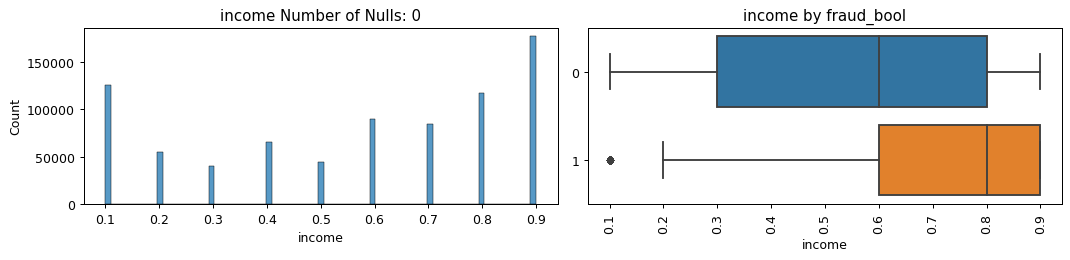

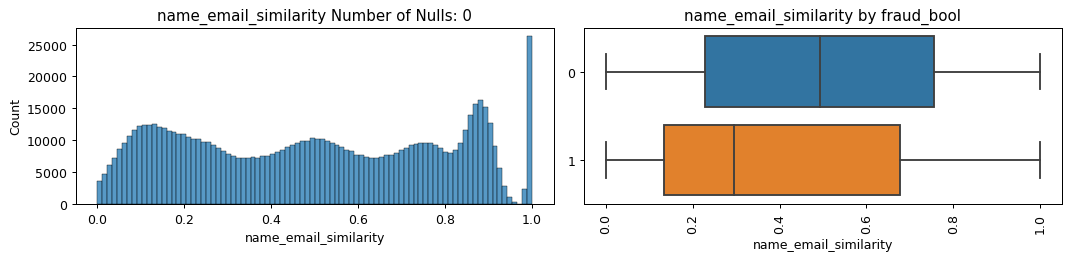

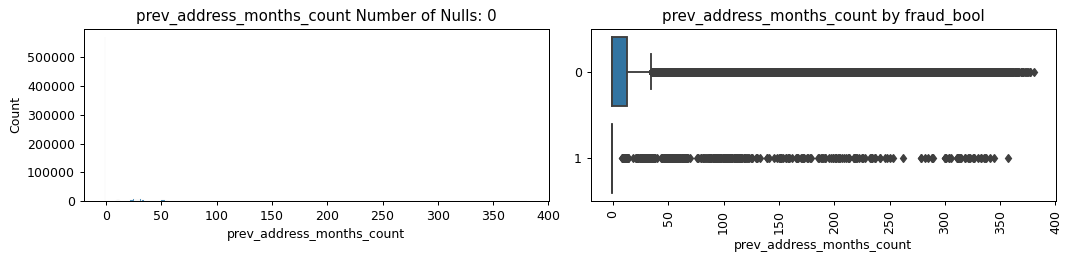

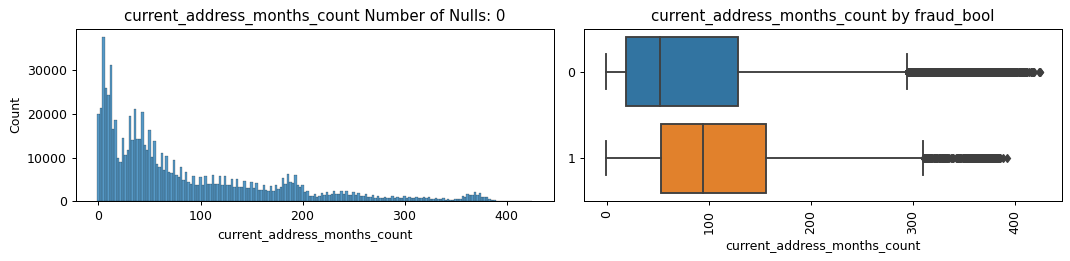

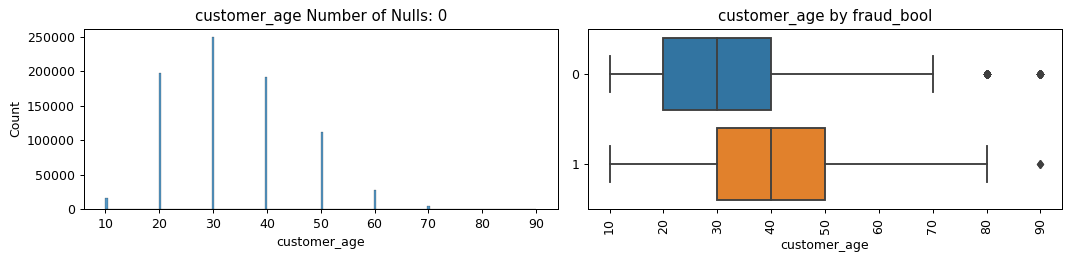

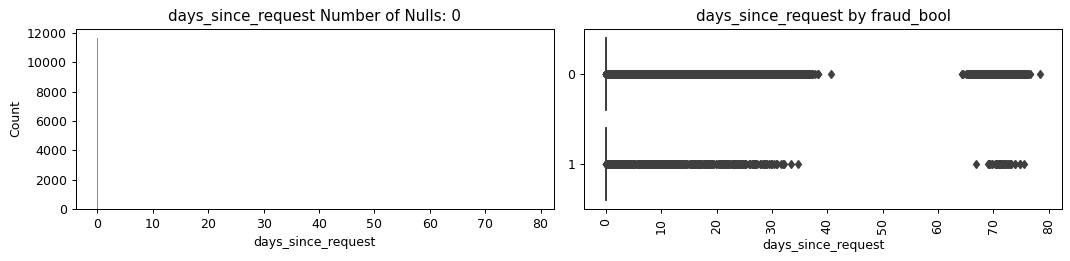

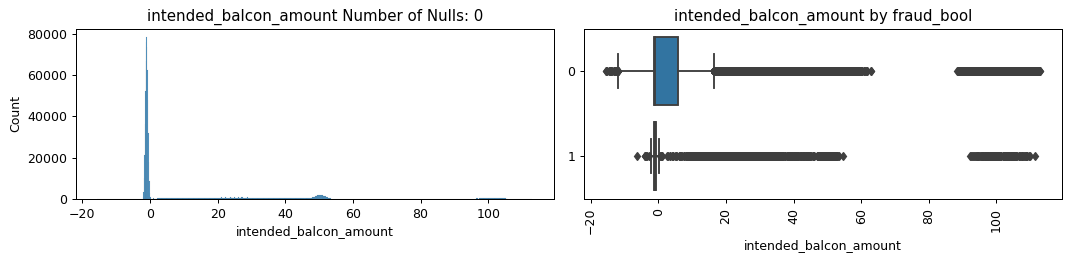

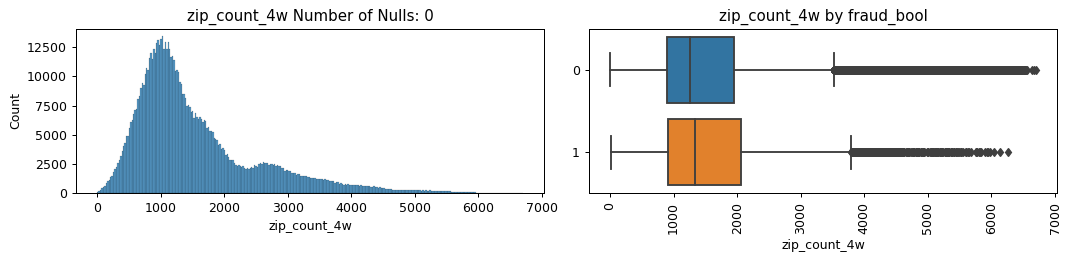

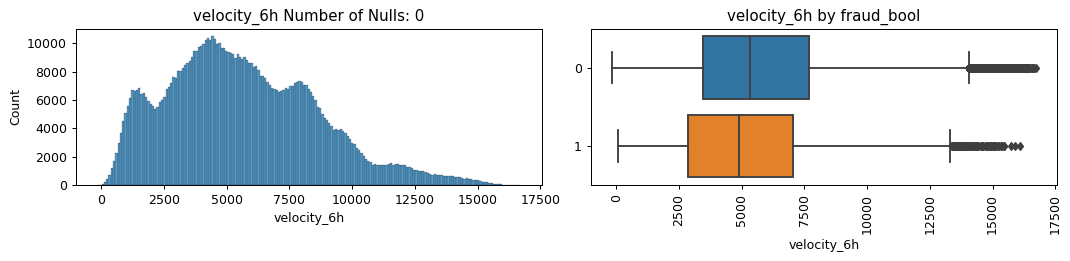

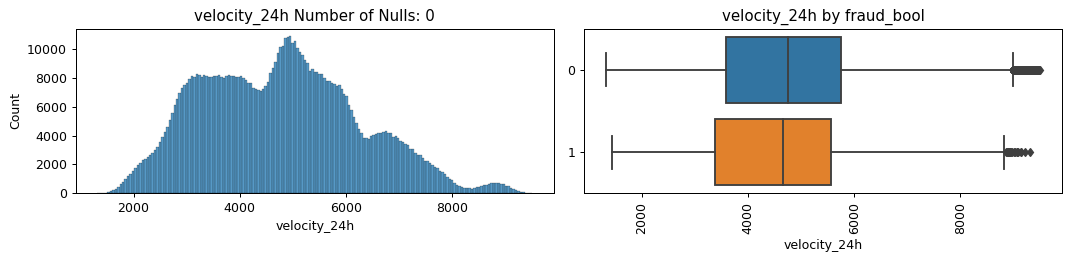

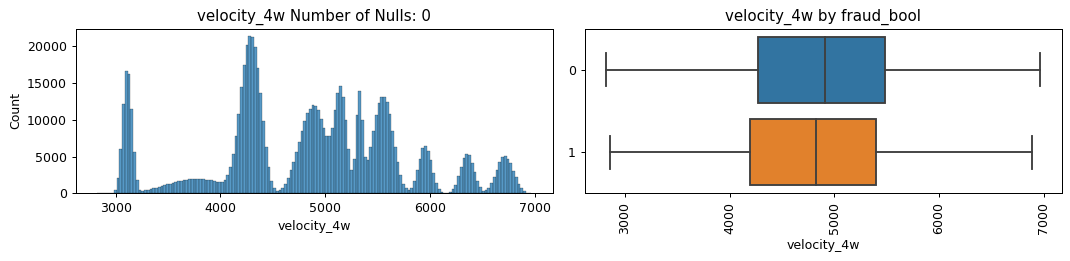

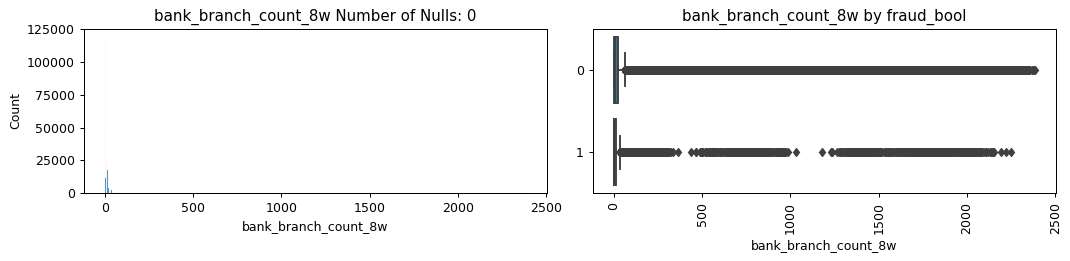

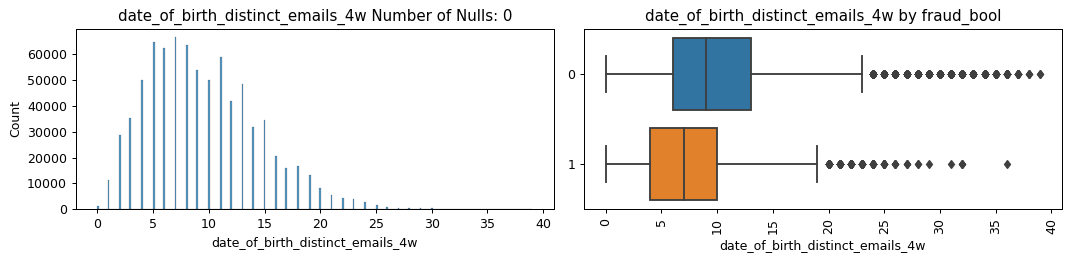

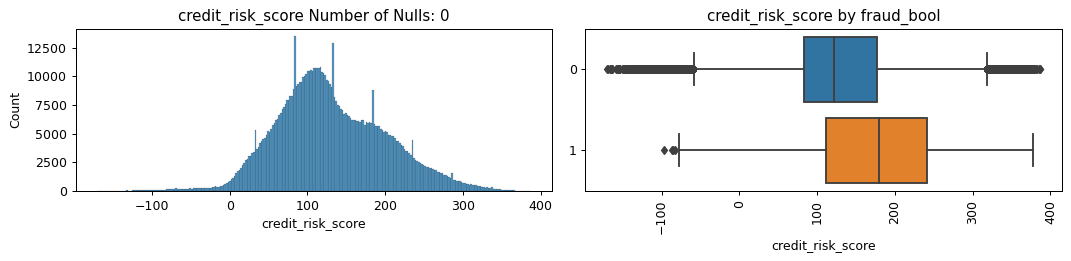

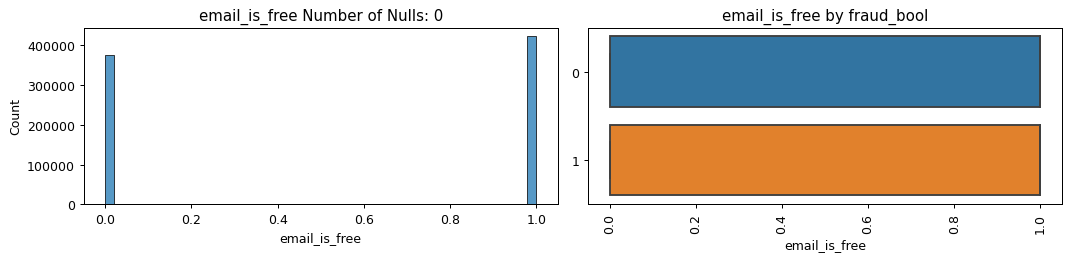

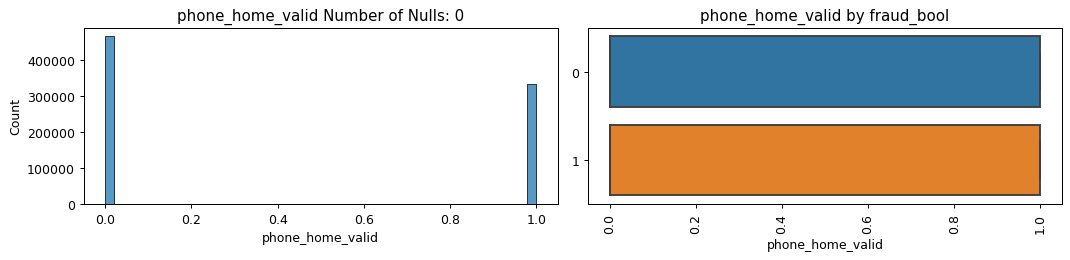

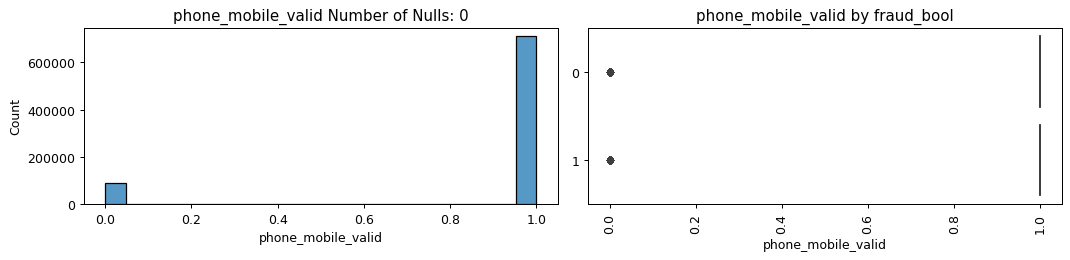

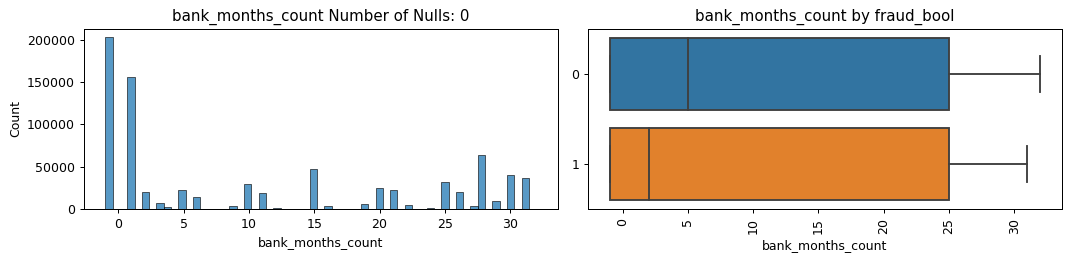

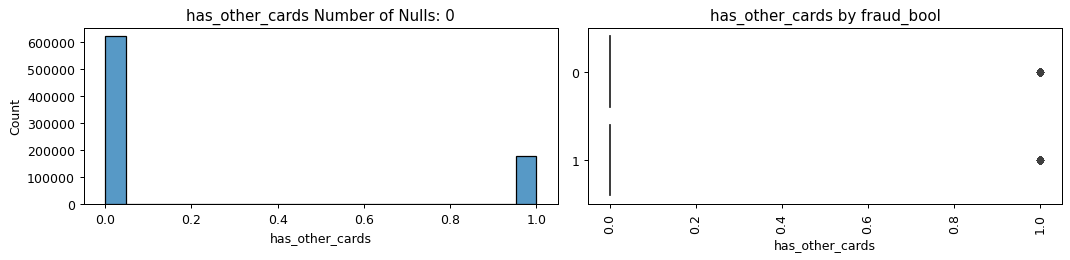

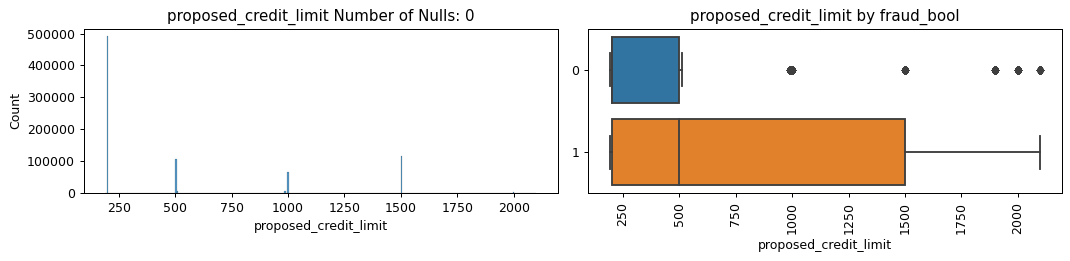

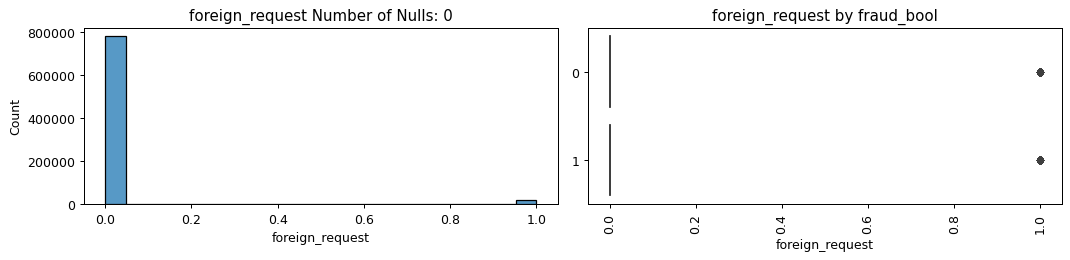

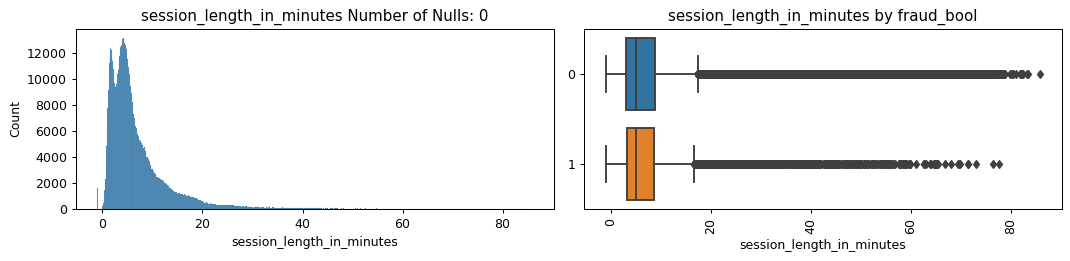

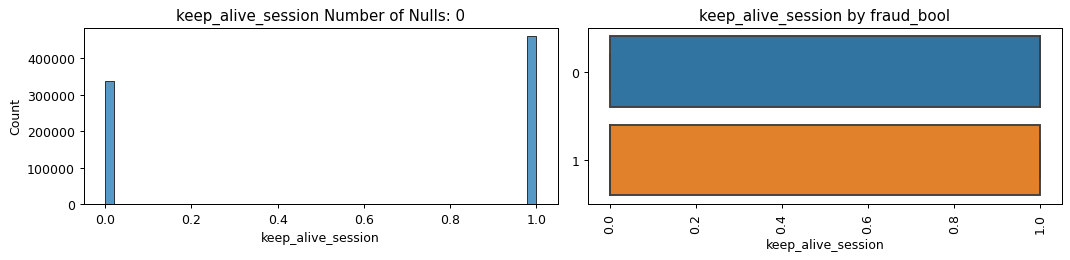

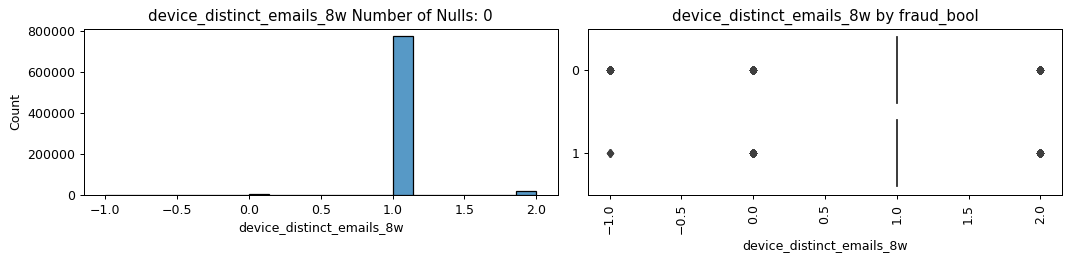

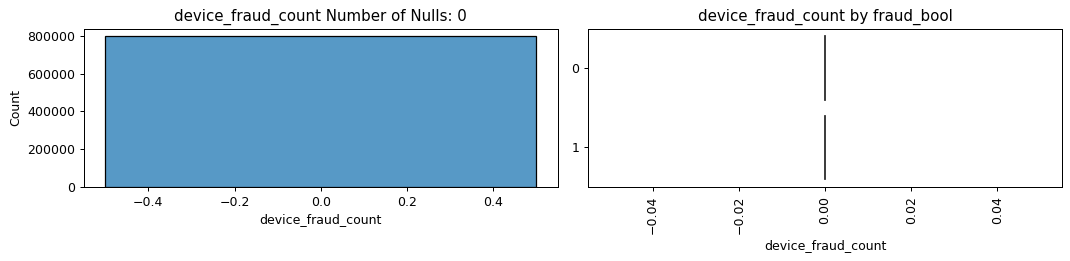

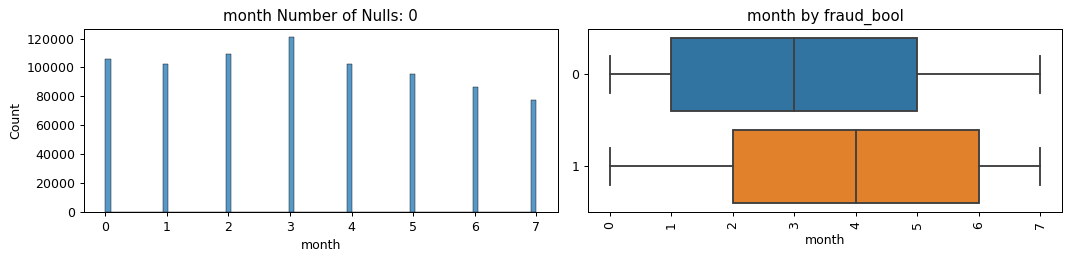

In [33]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
target = 'fraud_bool'

def plot_feature(pd_fraude_train, col_name, isContinuous, target):
    """
    Visualizes a variable with and without faceting based on the loan status.
    - df: DataFrame containing the data.
    - col_name: Name of the column (variable) to visualize.
    - isContinuous: Boolean indicating whether the variable is continuous.
    - target: Target variable for faceting.
    """
    # Create a figure with two subplots (histogram and boxplot or countplot and barplot).
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Count null values in the specified column.
    count_null = pd_fraude_train[col_name].isnull().sum()

    # Visualization of the variable. If continuous, use a histogram; if not, use a countplot.
    if isContinuous:
        sns.histplot(pd_fraude_train.loc[pd_fraude_train[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(x=pd_fraude_train[col_name], order=sorted(pd_fraude_train[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name + ' Number of Nulls: ' + str(count_null))
    plt.xticks(rotation=90)

    # Visualization as a function of the target variable. If continuous, use a boxplot; if not, use a barplot.
    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=pd_fraude_train, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by ' + target)
    else:
        data = pd_fraude_train.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index()
        data.columns = [col_name, target, 'proportion']
        sns.barplot(x=col_name, y='proportion', hue=target, data=data, saturation=1, ax=ax2)
        ax2.set_ylabel(target + ' fraction')
        ax2.set_title(target)
        plt.xticks(rotation=90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

# Assuming lista_variables_numericas is a list of column names
for i in lista_variables_numericas:
    plot_feature(pd_fraude_train, col_name=i, isContinuous=True, target='fraud_bool')


## Análisis Gráfico de Variables y su Relación con el Fraude

Los gráficos proporcionan una **visión detallada** sobre cada una de las variables del conjunto de datos, ofreciendo insights tanto a nivel individual como en su relación con la variable objetivo, en este caso, "fraud_bool". Estos gráficos nos permiten observar aspectos como la **concentración de valores** y la **presencia de distintos valores dentro de las variables**.

### Observaciones Clave

- **Ingreso ("income") y Fraude**: Observamos que un mayor ingreso se asocia con una **mayor probabilidad de fraude**. Esto podría indicar que los fraudes tienden a buscar las mayores ganancias posibles en el menor tiempo.

- **Edad y Fraude**: Los datos sugieren que las personas **entre 30 y 50 años** tienen una mayor probabilidad de cometer fraude.

- **"zip_count_4w" y la Variable Objetivo**: Esta variable muestra una **similitud en ambas categorías (fraude y no fraude)**, lo que sugiere que puede tener poca relevancia en la detección de fraude. Este patrón es similar al observado en las variables de "velocity".

- **"proposed_credit_limit" y Fraude**: Se nota que los **valores más altos de límite de crédito propuesto** están presentes en los casos de fraude, indicando que esta variable podría ser significativa en la identificación del fraude.

- **"credit_risk_score"**: Esta variable muestra que el **riesgo de crédito es generalmente más alto en casos de fraude**, lo que podría ser un indicador útil para la detección.

### Conclusiones y Pasos a Seguir

A partir de estas observaciones, se puede inferir que variables como el **"proposed_credit_limit"** y el **"credit_risk_score"** podrían ser cruciales en la modelización y detección del fraude. Sin embargo, es importante recordar que estas observaciones son **indicativas y no conclusivas**. Se requerirá un análisis más profundo, posiblemente con técnicas de aprendizaje automático, para confirmar estas hipótesis y entender mejor la relación entre estas variables y el fraude.



# 7 Tratamiento de las variables continuas

In [34]:
lista_variables_numericas

['income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

# 7.1 Tratamiento de outliers

In [35]:
import pandas as pd

def get_deviation_of_mean_perc(pd_fraude_train, lista_variables_numericas, target='fraud_bool', multiplier=3):
    """
    Identifies outliers in continuous variables based on deviations from the mean.

    Parameters:
    pd_fraud_train: DataFrame with the data.
    list_numeric_variables: List of numeric variable names.
    target: Target variable in the DataFrame.
    multiplier: Multiplier for the calculation of the confidence interval.

    Returns:
    A DataFrame with the outlier analysis for each numeric variable.
    """
    pd_final = pd.DataFrame()
    
    for i in lista_variables_numericas:
        # Calculate the mean and standard deviation of the variable.
        series_mean = pd_fraude_train[i].mean()
        series_std = pd_fraude_train[i].std()

        # Defines the range of normal values as the mean ± multiplier * standard deviation.
        std_amp = multiplier * series_std
        left = series_mean - std_amp
        right = series_mean + std_amp

        # Calculates the percentage of values inside and outside this range.
        size_s = pd_fraude_train[i].size
        perc_goods = pd_fraude_train[i][(pd_fraude_train[i] >= left) & (pd_fraude_train[i] <= right)].size / size_s
        perc_excess = pd_fraude_train[i][(pd_fraude_train[i] < left) | (pd_fraude_train[i] > right)].size / size_s
        
        # If there are outliers, add to pd_final.
        if perc_excess > 0:    
            pd_concat_percent = pd.DataFrame(pd_fraude_train[target][(pd_fraude_train[i] < left) | (pd_fraude_train[i] > right)]
                                             .value_counts(normalize=True).reset_index()).T
            if pd_concat_percent.shape[1] > 1:
                pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], pd_concat_percent.iloc[0,1]]
            else:
                pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], 'Otra Columna']
            pd_concat_percent = pd_concat_percent.drop(target, axis=0)
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_outlier_values'] = pd_fraude_train[i][(pd_fraude_train[i] < left) | (pd_fraude_train[i] > right)].size
            pd_concat_percent['porcentaje_sum_null_values'] = perc_excess
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
    # If pd_final is empty, it means that no significant outliers were found.
    if pd_final.empty:
        print('No existen variables con valores atípicos significativos')
        
    return pd_final


En la variable 'proposed_credit_limit' vemos que tiene un mayor porcentaje de fraude cometido, con casi un 13%.
Después del análisis, y como no hay demasiados outliers, he decidido dejarlos sin sustituir.

In [36]:
def IQR_method(df, n, features):
    """
    Identifies outliers in a DataFrame using the interquartile range (IQR) method.

    Parameters:
    df: Analysis DataFrame.
    n: Minimum number of outliers for a record to be considered as an outlier.
    features: List of features (columns) to be analysed.

    Returns:
    A list of indexes of records in the DataFrame that contain more than 'n' outliers.
    """
    outlier_list = []
    
    for column in features:
        # Calculate the first and third quartiles (25% and 75%) and the interquartile range.
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1

        # Defines an outlier step and determines the outlier indices.
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)

    # Selects observations containing more than 'n' outliers.
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

    return multiple_outliers


In [37]:
Outliers_IQR = IQR_method(pd_fraude_train,1,lista_variables_numericas)
df_out = pd_fraude_train.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [38]:
print ('Cantidad de fraudes antes de eliminar outliers: ', len(pd_fraude_train[pd_fraude_train['fraud_bool'] == 1]))
print ('Cantidad de fraudes después de eliminar outliers: ', len(df_out[df_out['fraud_bool'] == 1]))

Cantidad de fraudes antes de eliminar outliers:  8823
Cantidad de fraudes después de eliminar outliers:  4834


Se observa que al eliminar los outliers, perdemos una cantidad de información muy importante sobre la variable objetivo, por lo que al eliminarlos estaríamos alterando negativamente la información para la modelización. Además, el número de outliers representa una cantidad pequeña de mi dataset.

# 7.2 Correlaciones

In [39]:
def get_corr_matrix(dataset=None, metodo='pearson', size_figure=[10,8]):
    """
    Calculates and displays the correlation matrix of a DataFrame.

    Parameters:
    dataset: DataFrame for which to calculate the correlation matrix.
    method: Correlation method to use, default is 'pearson'.
    size_figure: Size of the figure of the graph.

    Returns:
    0 if execution is successful, 1 if dataset is missing.
    """
    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1

    # Setting the style of the graphics.
    sns.set(style="white")

    # Calculate the correlation matrix using the specified method.
    corr = dataset.corr(method=metodo) 

    # Set the auto-correlation values to zero to avoid distractions.
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0

    # Configure the matplotlib figure.
    f, ax = plt.subplots(figsize=size_figure)

    # Draw the correlation heatmap.
    sns.heatmap(corr, center=0, square=True, linewidths=.5, cmap='viridis')
    plt.show()
    
    return 0


## Análisis de la Matriz de Correlación

Las matrices de correlación nos proporcionan una visión cuantitativa de la interrelación entre las variables. Es común que las variables altamente correlacionadas sean candidatas para eliminación, ya que pueden no contribuir con información adicional al conjunto de datos.

### Correlaciones Notables

- **Atributos de "velocity"**: Se observa una correlación significativa entre estas variables, lo que podría indicar redundancia. La importancia de estas variables se determinará más adelante durante la selección de características.

- **"credit_risk_score" y "proposed_credit_limit"**: Existe una correlación positiva entre estas dos variables, lo que sugiere que los solicitantes con un límite de crédito propuesto mayor tienden a tener un score de riesgo interno más elevado.

- **"device_fraud_count" y "month"**: Se detecta una correlación negativa fuerte. Este patrón sugiere que cuando una variable aumenta, la otra tiende a disminuir, lo que podría indicar una detección variable de fraudes según el mes o mejoras en las medidas de detección a lo largo del tiempo.

- **"has_other_cards" y "proposed_credit_limit"**: La correlación positiva leve entre estas variables podría indicar que las personas con múltiples tarjetas suelen tener un límite de crédito más alto, posiblemente reflejando una calificación crediticia más favorable.

### Consideraciones Adicionales

- **Correlación "month" y "velocity_4w"**: A pesar de no ser evidente a primera vista, la correlación negativa entre 'month' y 'velocity_4w' podría revelar una tendencia estacional en la tasa de solicitudes, siendo más alta al principio del año y disminuyendo con el tiempo.

Por el momento, optamos por retener todas las variables para un análisis posterior en la selección de modelos. Es crucial comprender que **la correlación no implica causalidad**; las asociaciones observadas en esta matriz son puntos de partida para una investigación más detallada, no conclusiones definitivas.

unto de datos.junto de datos.

In [40]:
corr = pd_fraude_train[lista_variables_numericas].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.4]

,level_0,level_1,correlation
636,month,velocity_4w,0.847886
507,proposed_credit_limit,credit_risk_score,0.606284
635,month,velocity_24h,0.549936
269,velocity_4w,velocity_24h,0.538889
242,velocity_24h,velocity_6h,0.463295
316,date_of_birth_distinct_emails_4w,customer_age,0.419801
634,month,velocity_6h,0.409186
268,velocity_4w,velocity_6h,0.400419


In [41]:
posibles_variables_eliminar.append('velocity_4w')
posibles_variables_eliminar.append('velocity_24h')
# apuntamos posibles variables que sea desable eliminar en el futuro

# 7.3 Tratamiento de valores nulos

In [44]:

def get_deviation_of_mean_perc(pd_fraude_train, lista_variables_numericas, target='fraud_bool', multiplier=3):
    """
    Identifies outliers in continuous variables based on deviations from the mean.

    Parameters:
    - pd_fraud_train: DataFrame with the data.
    - list_numeric_variables: List of numeric variable names.
    - target: Target variable in the DataFrame.
    - multiplier: Multiplier for the calculation of the confidence interval.

    Returns:
    A DataFrame with the outlier analysis for each numeric variable.
    """

    pd_final = pd.DataFrame()
    
    for i in lista_variables_numericas:
        # Calculate the mean and standard deviation of the variable.
        series_mean = pd_fraude_train[i].mean()
        series_std = pd_fraude_train[i].std()

        # Defines the range of normal values as the mean ± multiplier * standard deviation.
        std_amp = multiplier * series_std
        left = series_mean - std_amp
        right = series_mean + std_amp

        # Calculates the percentage of values inside and outside this range.
        size_s = pd_fraude_train[i].size
        perc_goods = pd_fraude_train[i][(pd_fraude_train[i] >= left) & (pd_fraude_train[i] <= right)].size / size_s
        perc_excess = pd_fraude_train[i][(pd_fraude_train[i] < left) | (pd_fraude_train[i] > right)].size / size_s
        
        # If there are outliers, add to pd_final.
        if perc_excess > 0:    
            pd_concat_percent = pd.DataFrame(pd_fraude_train[target][(pd_fraude_train[i] < left) | (pd_fraude_train[i] > right)]
                                             .value_counts(normalize=True).reset_index()).T
            if pd_concat_percent.shape[1] > 1:
                pd_concat_percent.columns = [pd_concat_percent.iloc[0, 0], pd_concat_percent.iloc[0, 1]]
            else:
                pd_concat_percent.columns = [pd_concat_percent.iloc[0, 0], 'Otra Columna']
            pd_concat_percent = pd_concat_percent.drop(target, axis=0)
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_outlier_values'] = pd_fraude_train[i][(pd_fraude_train[i] < left) | (pd_fraude_train[i] > right)].size
            pd_concat_percent['porcentaje_sum_null_values'] = perc_excess
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores atípicos significativos')
        
    return pd_final


En este caso, la variable 'intended_balcon_amount' y 'prev_address_months_count' presenta un gran número de valores nulos en dataframe de entrenamiento, por lo que eliminar las filas donde esta variable sea nula está descartado.

Nuevamente, como no sé en principio como puede afectar la eliminación de dichas columnas a la hora de aplicar algoritmos, decido mantenerlas por el momento.

# 7.4 Tratamiento de las variables categóricas

In [45]:
lista_variables_categoricas

['payment_type',
 'employment_status',
 'housing_status',
 'source',
 'device_os',
 'fraud_bool']

In [46]:
pd_fraude_train[lista_variables_categoricas].select_dtypes(int).columns

Index([], dtype='object')

Una forma de obtener la correlación de variables categóricas, es mediante el método de spearman, que requiere de transformar estas variables a numéricas. Esto lo conseguimos con la matriz de dummies de estas variables

In [47]:
categorical_train_dummy = pd.DataFrame(pd.get_dummies(pd_fraude_train[lista_variables_categoricas]))


In [48]:
categorical_train_dummy.head()

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,fraud_bool_0,fraud_bool_1
514072,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
869571,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
446662,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False
189666,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False
837508,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False


Aqui podemos ver como quedan las variables categoricas, despues de la codificacion.

In [49]:
categorical_train_dummy = categorical_train_dummy.drop('fraud_bool_0', axis=1)
categorical_train_dummy = categorical_train_dummy.drop('fraud_bool_1', axis=1)


In [50]:
def get_corr_matrix(dataset = categorical_train_dummy, 
                metodo='spearman', size_figure=[10,8]):
    """
    Calculates and displays the correlation matrix of a DataFrame.

    Parameters:
    dataset: DataFrame for which to calculate the correlation matrix.
    method: Correlation method to use, default is 'pearson'.
    size_figure: Size of the figure of the graph.

    Returns:
    0 if execution is successful, 1 if dataset is missing.
    """
    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1

    # Setting the style of the graphics.
    sns.set(style="white")

    corr = dataset.corr(method=metodo) 

    # Set the auto-correlation values to zero to avoid distractions.
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0

    # Configure the matplotlib figure.
    f, ax = plt.subplots(figsize=size_figure)

    # Draw the correlation heatmap.
    sns.heatmap(corr, center=0, square=True, linewidths=.5, cmap='viridis')
    plt.show()
    
    return 0


In [51]:
corr = categorical_train_dummy.corr('spearman')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.4]

,level_0,level_1,correlation
539,source_TELEAPP,source_INTERNET,1.000000
161,employment_status_CB,employment_status_CA,0.659378
619,device_os_other,device_os_linux,0.509588
377,housing_status_BC,housing_status_BB,0.457477
26,payment_type_AB,payment_type_AA,0.452640
53,payment_type_AC,payment_type_AB,0.445015
647,device_os_windows,device_os_other,0.431919
645,device_os_windows,device_os_linux,0.422712


Similar al anterior, realizamos un analis de correlaciones, de las variables categoricas codificada.

Obviamente, las variables binarias, en este caso "source" con "TELEAPP" y "INTERNET" tienen una correlación perfecta negativa ya que cuando se da una de las opciones, no se puede dar la otra, y viceversa. Después se observa que las correlaciones más altas se dan entre valores de una misma variable categórica y son casi siempre negativas. 

Llegamos a la conclusión de que las variables categóricas no presentan una correlación aparente entre ellas.

Otra opción que tenemos es la asociación de Cramer

In [52]:
confusion_matrix = pd.crosstab(pd_fraude_train["keep_alive_session"], pd_fraude_train["fraud_bool"])
print(confusion_matrix)

def cramers_v(confusion_matrix):
    """ 
    Calculates the Cramér V statistic for the categorical-categorical association.

    Parameters:
    confusion_matrix: confusion matrix created with pd.crosstab().

    Returns:
    The value of Cramér V, which is a measure of association between two categorical variables.
    """
    # Chi-square calculation and corrections needed for the calculation of Cramér V.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


fraud_bool               0     1
keep_alive_session              
0.0                 332602  5802
1.0                 458575  3021


In [53]:
confusion_matrix = pd.crosstab(pd_fraude_train["employment_status"], pd_fraude_train["fraud_bool"])
print(confusion_matrix)

def cramers_v(confusion_matrix):
    """ 
    Calculates the Cramér V statistic for the categorical-categorical association.

    Parameters:
    confusion_matrix: confusion matrix created with pd.crosstab().

    Returns:
    The value of Cramér V, which is a measure of association between two categorical variables.
    """
    # Chi-square calculation and corrections needed for the calculation of Cramér V.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


fraud_bool              0     1
employment_status              
CA                 577086  7113
CB                 109932   773
CC                  29482   742
CD                  21053    82
CE                  18095    43
CF                  35173    65
CG                    356     5


In [54]:
confusion_matrix = pd.crosstab(pd_fraude_train["foreign_request"], pd_fraude_train["fraud_bool"])
print(confusion_matrix)

def cramers_v(confusion_matrix):
    """ 
    Calculates the Cramér V statistic for the categorical-categorical association.

    Parameters:
    confusion_matrix: confusion matrix created with pd.crosstab().

    Returns:
    The value of Cramér V, which is a measure of association between two categorical variables.
    """
    # Chi-square calculation and corrections needed for the calculation of Cramér V.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


fraud_bool            0     1
foreign_request              
0.0              771363  8374
1.0               19814   449


Después de probar entre diferentes variables, la mayor correlación con la variable objetivo la tiene 'keep_alive_session'

# 8 Tratamiento de valores nulos

En este caso, las variables categóricas no presentan valores nulos, por lo que no se tomará ninguna medida.

# 9 Guardado de los dataframes

In [55]:
pd_fraude_train.to_csv('./data/train_fraude_eda.csv')
pd_fraude_test.to_csv('./data/test_fraude_eda.csv')

# Conclusión



1. **Desequilibrio Significativo:** El dataset presenta un desequilibrio considerable, ya que la variable objetivo representa solo aproximadamente el 1% del total del dataset. Este bajo porcentaje sugiere que la influencia de esta variable es mínima en el conjunto general de datos, lo que podría presentar desafíos en la modelización y en la interpretación de los resultados.

2. **Manejo de Valores Faltantes:** Los valores faltantes, identificados como números negativos, se concentran principalmente en variables como "intended_balcon_amount", "prev_address_months_count" y "bank_months_count". Estas variables presentan un alto volumen de valores nulos, lo que requiere una atención especial en términos de limpieza y preparación de datos.

3. **Análisis de Variables Categóricas y Numéricas:** Se realizó una exploración detallada tanto de variables categóricas como numéricas, separándolas y analizándolas individualmente. Este enfoque nos permitió obtener una comprensión más profunda de cada tipo de variable y su comportamiento dentro del dataset.

4. **Asimetría en las Variables:** La asimetría observada en variables como "days_since_request" y "foreign_request" indica una desviación significativa de la distribución normal. Este hallazgo sugiere la necesidad de transformaciones adicionales en estas variables para mejorar la interpretación y el modelado.

5. **Preprocesamiento y Preparación de Datos:** Se planea realizar un preprocesamiento adicional, que incluye la selección y posible eliminación de variables menos importantes. Este paso es crucial para simplificar el análisis posterior y garantizar que los datos estén adecuadamente preparados para el modelado.

6. **Visualización y Análisis Comparativo:** Se llevará a cabo una visualización detallada de los datos, comparándolos con la variable objetivo. Este análisis comparativo es esencial para obtener insights más profundos y entender mejor la relación entre las variables.

7. **Tratamiento de Outliers y Valores Nulos:** Finalmente, se abordó la cuestión de los valores atípicos y los valores nulos inexistentes. Además, se realizó una evaluación de las variables categóricas y otros aspectos similares para asegurar la calidad y la integridad del dataset.este es un dataset altamente desbalanceado, el cual cos y faltantes.frames
Conclsuiont	